In [44]:
import numpy as np  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [47]:
voice_path = '/home/s/Ai/nltk_s/data/voice/'

easy = '쉬운데.wav'
hard = '힘들어.wav'

In [48]:
voice_easy, sr = librosa.load(os.path.join(voice_path, easy))
voice_hard, _ = librosa.load(os.path.join(voice_path, hard))
# 위 sample rate와 같은 주파수영역 사용하기 위해 "_" 사용

In [49]:
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

In [50]:
ipd.Audio(os.path.join(voice_path, easy))


/tmp/ipykernel_79785/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
/home/s/venv/tensorflow/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/s/venv/tensorflow/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


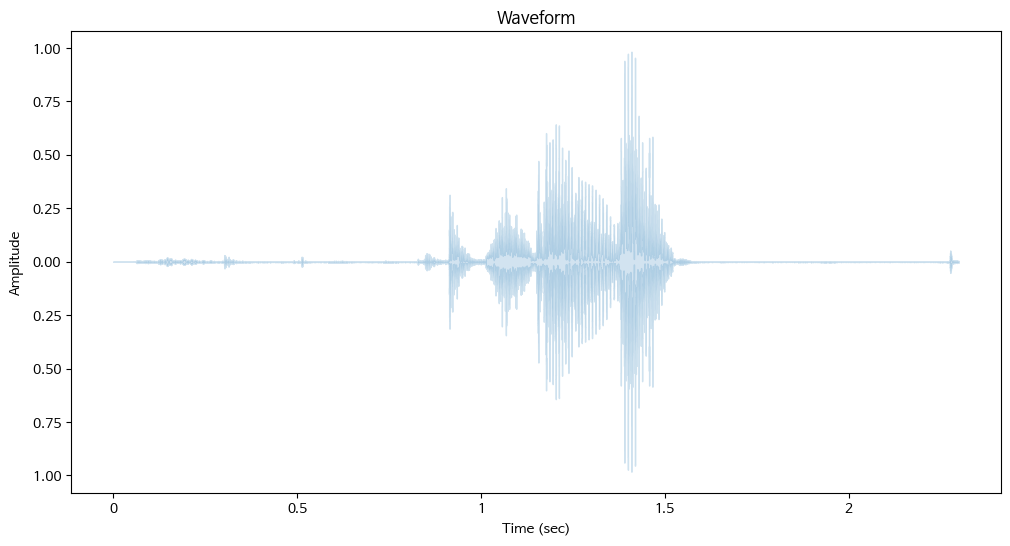

In [51]:
draw_wave(voice_easy, sr)

In [52]:
ipd.Audio(os.path.join(voice_path, hard))

/tmp/ipykernel_79785/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


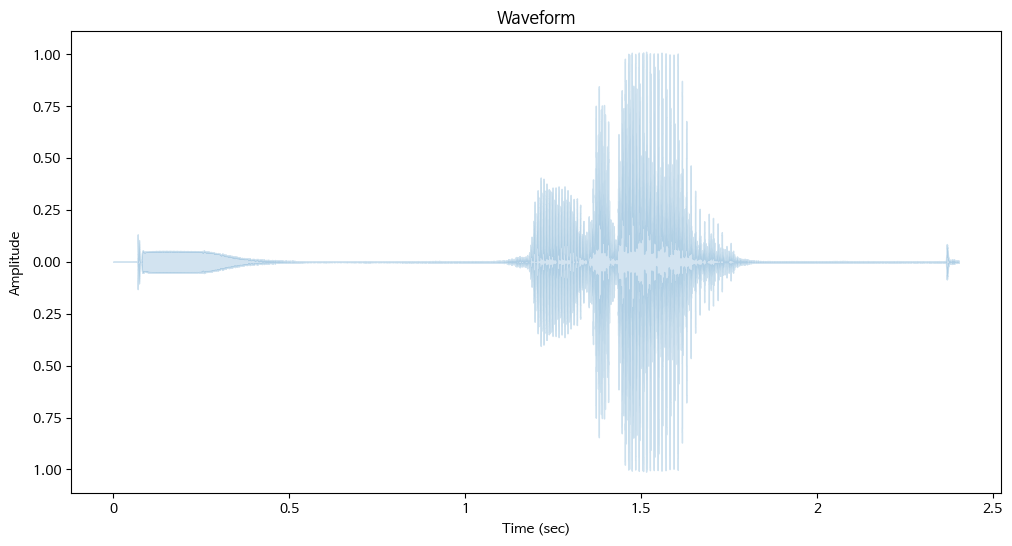

In [53]:
draw_wave(voice_hard, sr)

easy1, sr = librosa.load(os.path.join(voice_path, easy))
hard1, _ = librosa.load(os.path.join(voice_path, hard))

In [54]:
voice_easy.shape

(50688,)

In [55]:
voice_easy_ft = np.fft.fft(voice_easy)
voice_easy_ft.shape

(50688,)

In [56]:
voice_easy_ft[0] #복소수가 있음을 확인

(0.6709841275911298+0j)

In [57]:
magnitude_voice_easy = np.abs(voice_easy_ft) #절댓값 씌워서 복소수 제거

In [58]:
magnitude_voice_easy[0] #복소수 제거된 실제 magnitude

0.6709841275911298

In [59]:
# def plot_magnitude_spectrum(sample_sounds, title, sr):
#     ft = np.fft.fft(sample_sounds)
#     magnitude = np.abs(ft)
#     frequency = np.linspace(0, sr, len(magnitude))
    
#     # FFT변환한 결과로 나온 specturm은 대칭구조의 모습을 보인다.
#     # high frequency 부분 반절을 잘라내고 앞쪽 반절만 사용.
#     left_frequency = frequency[:int(len(frequency)/2)]
#     left_magnitude = magnitude[:int(len(magnitude)/2)]

#     plt.figure(figsize=(15, 5))
#     plt.plot(left_frequency, left_magnitude)
#     plt.title(title)
#     plt.xlabel('frequency (Hz)')
#     plt.ylabel('magnitude')
    
#     plt.show()

In [60]:
# plot_magnitude_spectrum(easy1, "voice_easy", sr)


In [61]:
# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, title, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title(title)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    
    plt.show()

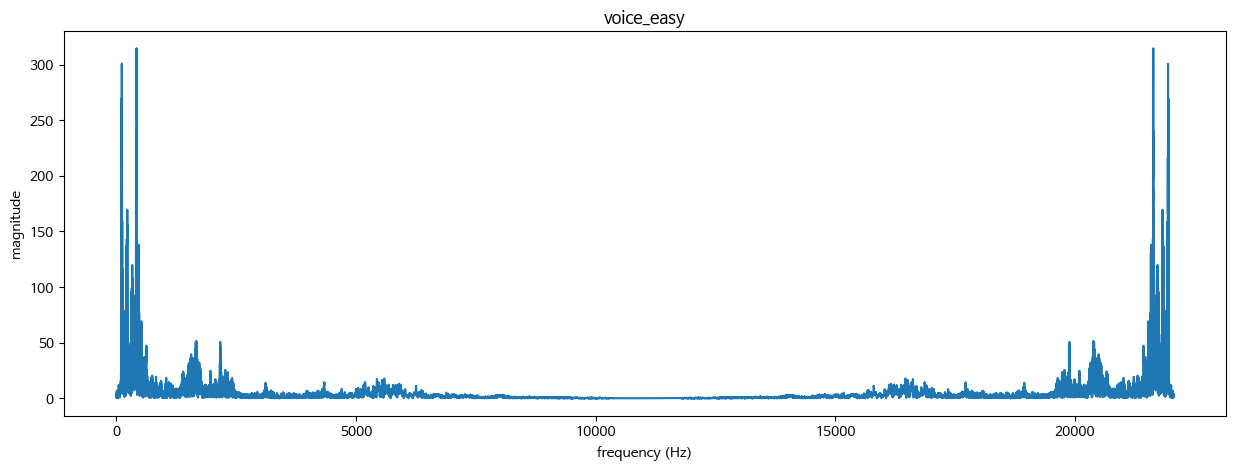

In [62]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 1)
# 22,050Hz가 default 

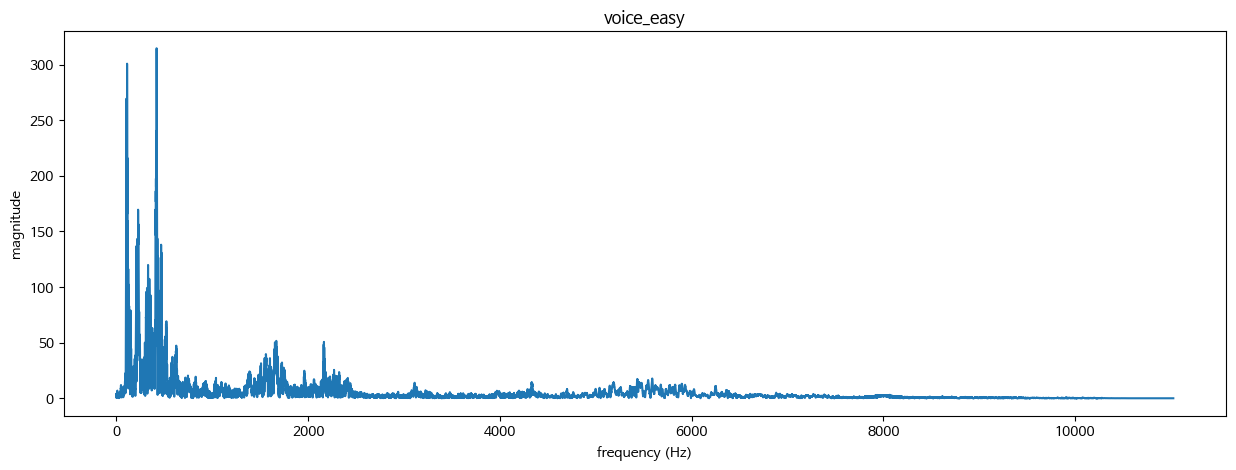

In [63]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

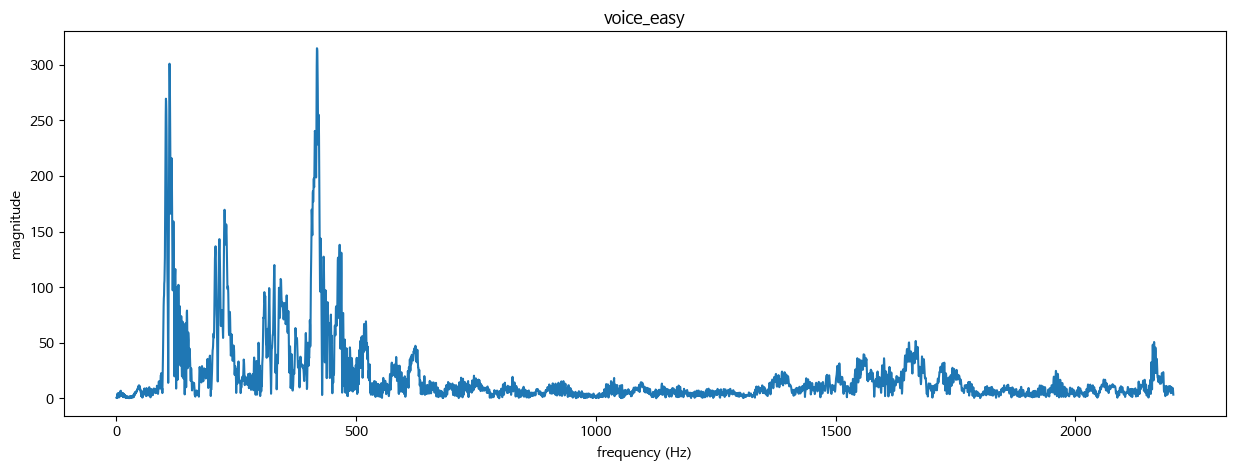

In [64]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.1)
#유효한 스펙트럼까지 슬라이싱

In [65]:
# #librosa가 제공하는 STFT 결과 얻어오는 함수
# def get_stft(sample_sounds):
#     return librosa.stft(sample_sounds)
# #stft한 결과를 그리는 함수
# def draw_stft(sample_sounds, ylim=(None, None)):
#     plt.figure(figsize=(12,6))
#     librosa.display.specshow(np.abs(get_stft(sample_sounds)),
#                              y_axis='hz', x_axis='s')
#     plt.ylim(ylim); plt.grid(); plt.show()

In [66]:
# #STFT를 통해 생성된 matrix
# S = np.abs(librosa.stft(voice_easy))
# S

In [67]:
#mel filter bank
melfb = librosa.filters.mel(sr=16000, n_fft=2048, fmax=8000)
melfb


array([[-0.        ,  0.01428889,  0.02857778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00043527,
         0.00021763,  0.        ]], dtype=float32)

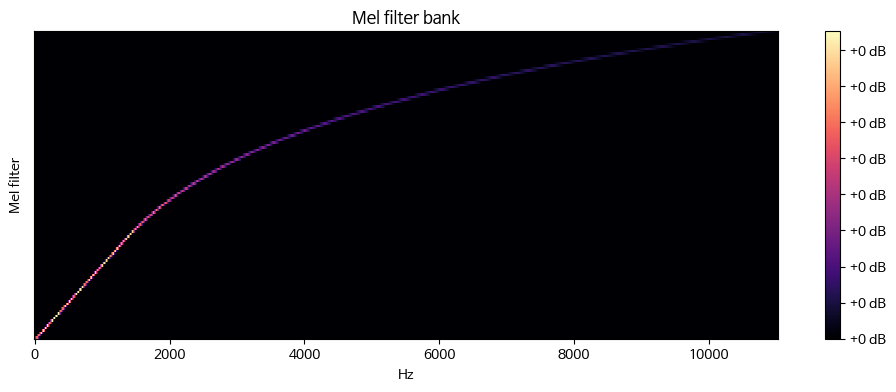

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar(format='%+02.0f dB')

/tmp/ipykernel_79785/338176079.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00163173 -0.00141811
 -0.00139962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000)


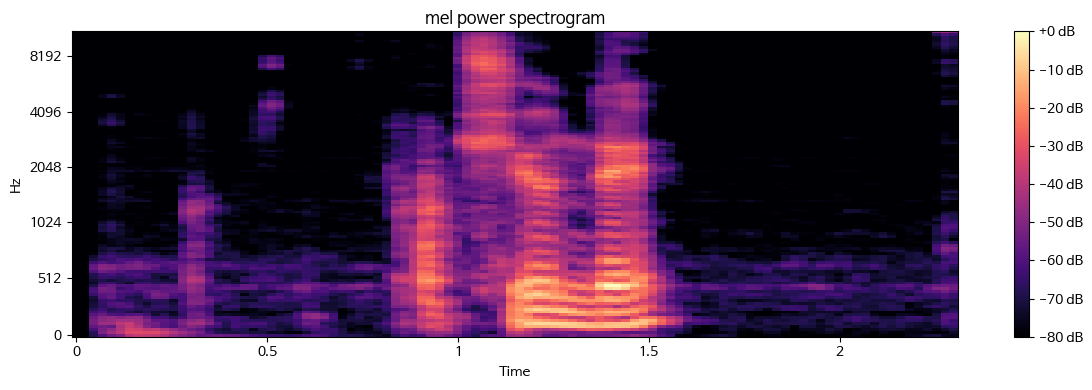

In [69]:
S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000) 
 
S_dB= librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+02.0f dB')
plt.title('mel power spectrogram')
plt.tight_layout()
plt.show()

In [70]:
#sacling
min_level_db = -100
 
def normalize(S):
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)

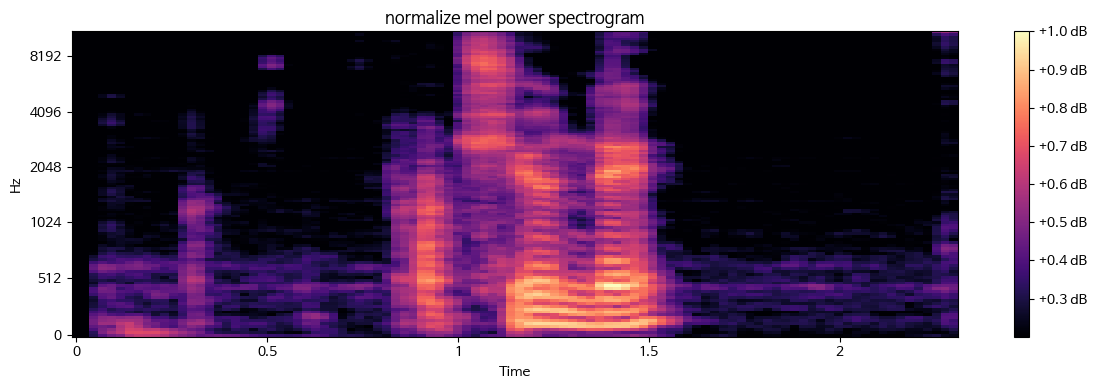

In [71]:
normalize_S = normalize(S_dB)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(normalize_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+0.1f dB')
plt.title('normalize mel power spectrogram')
plt.tight_layout()
plt.show()

/tmp/ipykernel_96862/3812786399.py:35: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01274624 -0.0130742
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_96862/3812786399.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00169287 0.00305082 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_96862/3812786399.py:35: FutureWarning: Pass y=[0.         0.         0.         ... 0.00761424 0.00568015 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
/tmp/ipykernel_96862/3812786399.py:35: FutureWarning: Pass

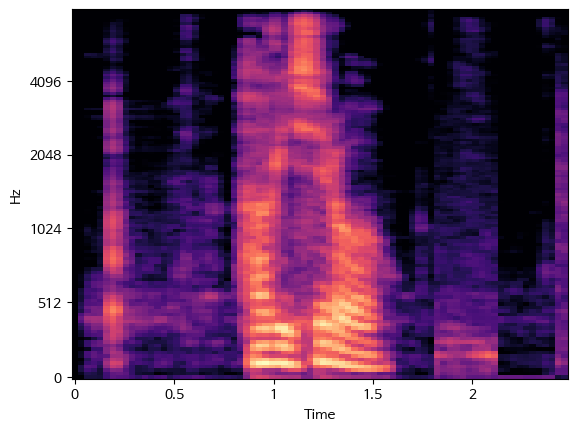

In [61]:
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd
import hgtk # https://github.com/bluedisk/hangul-toolkit
mpl.rc('font', family="NanumBarunGothic")
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform__" + file_path.split('/')[7].split('.')[0]); #plt.show(); 

#FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title('FFT__' + file_path.split('/')[7].split('.')[0])
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    plt.show()

#scaling한 mel_spectogram 그리는 함수
def plot_nomalize_mel_spectrogram(sample_sounds, sr):
    S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000) 
    S_dB= librosa.power_to_db(S, ref=np.max)
    min_level_db = -100
    normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
    #plt.figure(figsize=(12, 4))
    librosa.display.specshow(normalize_spectro, sr=sr, x_axis='time', y_axis='mel')
    #plt.colorbar(format='%+0.1f dB')
    #plt.title('normalize mel power spectrogram__' + file_path.split('/')[7].split('.')[0])
    #plt.tight_layout()
    path = '/home/s/Ai/nltk_s/data/plot/'
    plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')
    #plt.show()
    

def mel_specto_split(jamo_sent, normalize_spectro, time_frame_num, char_frame_num):
    mpl.rc('font', family="NanumBarunGothic")
    mel_freq_num = 140
    plt.figure(figsize=(20, 150))
    jamo_sent_size = len(jamo_sent)
    for i in range(0, jamo_sent_size):
        plt.subplot(jamo_sent_size, 5, i+1)
        start_position = (i * char_frame_num) - 1
        end_position = ((i+1) * char_frame_num) + 1
        if(start_position < 0):
            start_position = 0
            end_position = end_position + 1
        if(end_position > time_frame_num):
            start_position = start_position - (end_position - time_frame_num)
            end_position = time_frame_num
        window = normalize_spectro[0:mel_freq_num, start_position:end_position]
        plt.pcolor(window, cmap='jet')
        plt.title(str(jamo_sent[i]))
        plt.colorbar()



voice_path = '/home/s/Ai/nltk_s/data/voice/'

for (root, directories, files) in os.walk(voice_path):
    for d in directories:
        d_path = os.path.join(root, d)
        

    for file in files:
        file_path = os.path.join(root, file)
        voice, sr = librosa.load(file_path, sr=16000)
        
        # draw_wave(voice, sr)
        # plot_magnitude_spectrum(voice, sr, 0.1) #유효한 스펙트럼까지 슬라이싱
        plot_nomalize_mel_spectrogram(voice, sr)

        # S = librosa.feature.melspectrogram(voice, sr=sr, n_mels=128, fmax=8000) 
        # S_dB= librosa.power_to_db(S, ref=np.max)
        # min_level_db = -100
        # normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
        # path = '/home/s/Ai/nltk_s/data/plot/'
        # plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


In [91]:
voice

array([ 0.        ,  0.        ,  0.        , ..., -0.01274624,
       -0.0130742 ,  0.        ], dtype=float32)

### 이미지 리사이즈

In [1]:
import os
import glob
from PIL import Image

files = glob.glob('/home/s/Ai/nltk_s/data/plot/*.png')

for f in files:
    img = Image.open(f)
    img_resize = img.resize((int(img.width / 2), int(img.height / 2)))
    title, ext = os.path.splitext(f)
    img_resize.save(title + ext)

### GPU사용

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2023-01-17 13:52:41.277849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 13:52:41.739526: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-17 13:52:43.122447: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2023-01-17 13:52:43.122753: W tensorflow/compiler/xla/strea

### 폴더 확인

In [3]:
!ls /home/s/Ai/nltk_s/data/plot/

안좋아요_10.png  안좋아요_14.png  안좋아요_2.png  안좋아요_6.png
좋아요_10.png	 좋아요_14.png	  좋아요_2.png	  좋아요_6.png
아_10.png	 아_14.png	  아_2.png	  아_6.png
안좋아요_11.png  안좋아요_15.png  안좋아요_3.png  안좋아요_7.png
좋아요_11.png	 좋아요_15.png	  좋아요_3.png	  좋아요_7.png
아_11.png	 아_15.png	  아_3.png	  아_7.png
안좋아요_12.png  아_16.png	  안좋아요_4.png  안좋아요_8.png
좋아요_12.png	 아_17.png	  좋아요_4.png	  좋아요_8.png
아_12.png	 아_18.png	  아_4.png	  아_8.png
안좋아요_13.png  안좋아요_1.png   안좋아요_5.png  안좋아요_9.png
좋아요_13.png	 좋아요_1.png	  좋아요_5.png	  좋아요_9.png
아_13.png	 아_1.png	  아_5.png	  아_9.png


In [4]:
import glob
file_list = glob.glob('/home/s/Ai/nltk_s/data/plot/*')
file_list

['/home/s/Ai/nltk_s/data/plot/아_10.png',
 '/home/s/Ai/nltk_s/data/plot/아_2.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_10.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_4.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_1.png',
 '/home/s/Ai/nltk_s/data/plot/아_18.png',
 '/home/s/Ai/nltk_s/data/plot/아_5.png',
 '/home/s/Ai/nltk_s/data/plot/아_1.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_14.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_13.png',
 '/home/s/Ai/nltk_s/data/plot/아_16.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_12.png',
 '/home/s/Ai/nltk_s/data/plot/아_8.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_9.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_5.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_6.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_11.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_7.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_10.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_4.png',
 '/home/s/Ai/nltk_s/data/plot/아_6.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_8.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_15.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요

### 라벨만 슬라이싱

In [5]:
label_name = [each.split('/')[-1].split('.')[0].split('_')[0] for each in file_list]
label_name

['아',
 '아',
 '좋아요',
 '좋아요',
 '좋아요',
 '아',
 '아',
 '아',
 '안좋아요',
 '좋아요',
 '아',
 '안좋아요',
 '아',
 '좋아요',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '안좋아요',
 '아',
 '안좋아요',
 '좋아요',
 '좋아요',
 '아',
 '좋아요',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '좋아요',
 '좋아요',
 '아',
 '아',
 '안좋아요',
 '안좋아요',
 '안좋아요',
 '좋아요',
 '아',
 '아',
 '아',
 '아',
 '아',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '안좋아요',
 '아',
 '아']

### 갯수 확인

In [6]:
len(file_list), len(label_name)

(48, 48)

### DF

In [7]:
import pandas as pd

file_list_pd = pd.DataFrame({'path':file_list, 'label':label_name})
file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    48 non-null     object
 1   label   48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


### 라벨 현황

<AxesSubplot: >

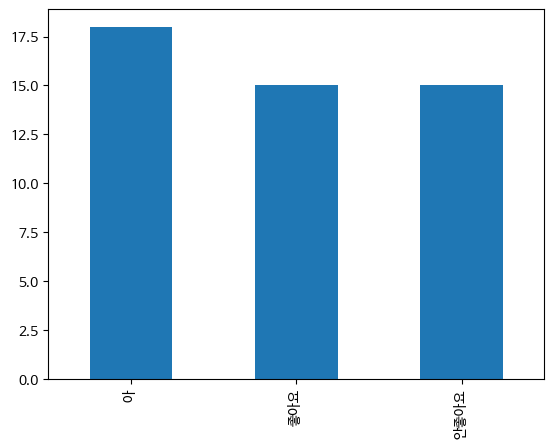

In [8]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")

file_list_pd['label'].value_counts().plot.bar()

### 분류를 위해 라벨에서 하나씩

In [9]:
random_sample = file_list_pd.groupby('label', group_keys=False).apply(lambda x: x.sample(1))

random_sample

,path,label
47,/home/s/Ai/nltk_s/data/plot/아_12.png,아
35,/home/s/Ai/nltk_s/data/plot/안좋아요_2.png,안좋아요
15,/home/s/Ai/nltk_s/data/plot/좋아요_6.png,좋아요


### 라벨 갯수확인

In [10]:
random_sample.count()

path     3
label    3
dtype: int64

### 라벨에 매칭해줄 딕셔너리 생성

In [11]:
wav_dict = {'아' : 0,
            '안좋아요' : 1,
            '좋아요' : 2,
            # '상쾌해' : 3,
            # '힘들어' : 4,
            # '쉬운데' : 5,
            # '추워' : 6,
            # '좋지않아' : 7,
            # '시끄러워' : 8,
            # '하기싫어' : 9,
            # '최고야' : 10,
            # '별로야' : 11,
            # '좋아' : 12,
            # '더워' : 13,
            # '우울해' : 14,
            # '짜증나' : 15,
            # '닥쳐' : 16,
            # '날아갈것같아':17
            }

In [12]:
# 라벨로 변환
class_label = []
for label in file_list_pd['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
file_list_pd['class'] = class_label
file_list_pd

,path,label,class
0,/home/s/Ai/nltk_s/data/plot/아_10.png,아,0
1,/home/s/Ai/nltk_s/data/plot/아_2.png,아,0
2,/home/s/Ai/nltk_s/data/plot/좋아요_10.png,좋아요,2
3,/home/s/Ai/nltk_s/data/plot/좋아요_4.png,좋아요,2
4,/home/s/Ai/nltk_s/data/plot/좋아요_1.png,좋아요,2
5,/home/s/Ai/nltk_s/data/plot/아_18.png,아,0
6,/home/s/Ai/nltk_s/data/plot/아_5.png,아,0
7,/home/s/Ai/nltk_s/data/plot/아_1.png,아,0
8,/home/s/Ai/nltk_s/data/plot/안좋아요_14.png,안좋아요,1
9,/home/s/Ai/nltk_s/data/plot/좋아요_13.png,좋아요,2


### 라벨 하나씩 뽑은걸 그리는 함수

In [13]:
import matplotlib.pyplot as plt

def draw_sample_pic_file_list(df):
    fig = plt.figure(1, figsize = (24, 20))

    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6, 6, cnt)
        cnt+=1
        image= plt.imread(row['path'])
        plt.imshow(image)
        plt.axis('off')
        plt.title(row['label'])
        
    plt.tight_layout()
    plt.show()

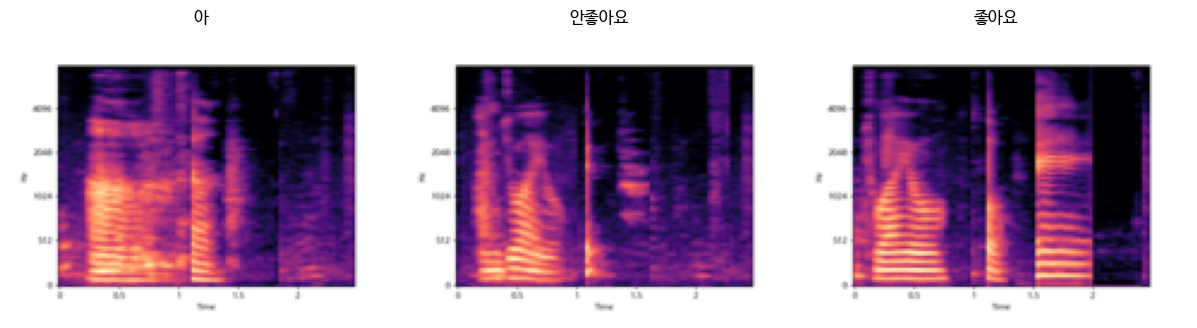

In [14]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")
draw_sample_pic_file_list(random_sample)

### train test로 데이터 분할

In [17]:
from sklearn.model_selection import train_test_split

train_data_condi, test_data = train_test_split(file_list_pd,
                                                test_size =0.1,
                                                stratify= file_list_pd['label'],
                                                random_state=13)

In [18]:
len(train_data_condi), len(test_data)

(43, 5)

### train validation으로 데이터 분할

In [19]:
train_data, val_data = train_test_split(train_data_condi,
                                                test_size =0.2,
                                                stratify= train_data_condi['label'],
                                                random_state=13)

In [20]:
len(train_data), len(val_data)

(34, 9)

In [21]:
train_data

,path,label,class
30,/home/s/Ai/nltk_s/data/plot/좋아요_14.png,좋아요,2
41,/home/s/Ai/nltk_s/data/plot/아_17.png,아,0
39,/home/s/Ai/nltk_s/data/plot/아_15.png,아,0
23,/home/s/Ai/nltk_s/data/plot/좋아요_8.png,좋아요,2
24,/home/s/Ai/nltk_s/data/plot/아_9.png,아,0
10,/home/s/Ai/nltk_s/data/plot/아_16.png,아,0
47,/home/s/Ai/nltk_s/data/plot/아_12.png,아,0
34,/home/s/Ai/nltk_s/data/plot/안좋아요_1.png,안좋아요,1
11,/home/s/Ai/nltk_s/data/plot/안좋아요_12.png,안좋아요,1
28,/home/s/Ai/nltk_s/data/plot/안좋아요_9.png,안좋아요,1


### 훈련용 데이터 현황

<AxesSubplot: >

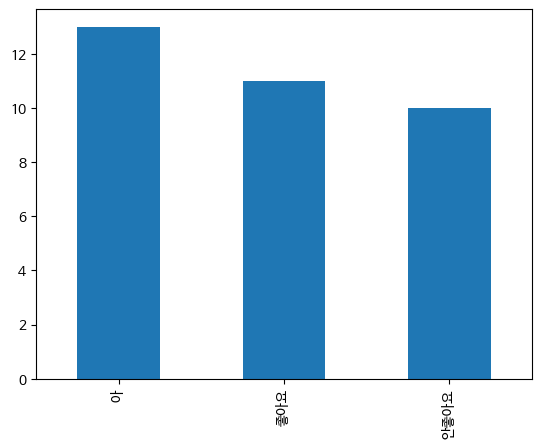

In [22]:
train_data['label'].value_counts().plot.bar()

### 검증용 데이터 현황

<AxesSubplot: >

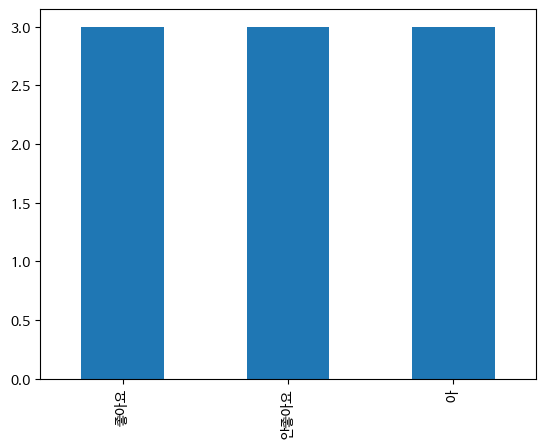

In [23]:
val_data['label'].value_counts().plot.bar()

### 테스트용 데이터 현황

<AxesSubplot: >

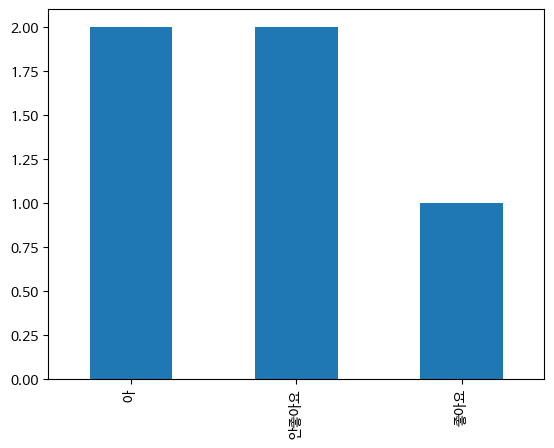

In [24]:
test_data['label'].value_counts().plot.bar()

### 이미지 크기확인

In [26]:
# Know image size
from PIL import Image

im = Image.open('/home/s/Ai/nltk_s/data/plot/아_1.png')
width, height = im.size
print(width, height)

160 120


### 훈련용 데이터

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

train_generator = train_data_gen.flow_from_dataframe(
                    dataframe = train_data,
                    target_size = (160, 120),
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label'
)

Found 34 validated image filenames belonging to 3 classes.


### 검증용 데이터

In [29]:
val_data_gen = ImageDataGenerator(rescale=1./255)    

val_generator = val_data_gen.flow_from_dataframe(
                    dataframe = val_data,
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label',
                    target_size = (160, 120),
                    seed = 13,
                    shuffle = False
)

Found 9 validated image filenames belonging to 3 classes.


### 테스트용 데이터

In [30]:
test_data_gen = ImageDataGenerator(rescale=1./255)    

test_generator = test_data_gen.flow_from_dataframe(
                    dataframe = test_data,
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label',
                    target_size = (160, 120), #이미지 크기
                    seed = 13,
                    shuffle = False
)

Found 5 validated image filenames belonging to 3 classes.


In [33]:
len(file_list)

48

### CNN모델 구현

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras import layers, models

#CNN모델 구현
model = Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(160,120,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    # layers.Conv2D(16,(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # layers.Conv2D(256,(3,3), activation='relu', padding='same'),
    # layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(wav_dict), activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 160, 120, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 80, 60, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 80, 60, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 80, 60, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 40, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 40, 30, 64)       

### 컴파일

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 훈련시작

In [46]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 16.0158 - accuracy: 0.2647 - val_loss: 1.4428 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 1s 377ms/step - loss: 2.8707 - accuracy: 0.2941 - val_loss: 1.3389 - val_accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - 1s 786ms/step - loss: 2.0398 - accuracy: 0.3824 - val_loss: 1.1379 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 1s 808ms/step - loss: 1.2683 - accuracy: 0.2647 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 1s 324ms/step - loss: 1.1220 - accuracy: 0.3529 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 1s 766ms/step - loss: 1.0977 - accuracy: 0.2941 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 7/50
2/2 [==============================] - 1s 782ms/step - loss: 1.0984 - accuracy: 0.3529 - val_loss: 1.0981 - val_accuracy: 0.2222
Epoch 8/50
2/2 [======